In [11]:
import pandas as pd 


In [12]:
df_1 = pd.read_csv('forecasts_and_truth.csv')

In [13]:

# Rename the column 'state_abbreviation' to 'abbreviation'
df_1 = df_1.rename(columns={'abbreviation': 'location_key'})


df_1['location_key'] = 'US_' + df_1['location_key'].astype(str)

df_1.dropna(subset=['forecast_value'], inplace=True)

columns_to_keep = ['location_key', 'forecast_value', 'target_end_date']
# Create a list of column names to keep
# Select only the specified columns
df_1 = df_1[columns_to_keep]



display(df_1)

,location_key,forecast_value,target_end_date
0,US_AL,920.000,2020-04-11
1,US_AK,86.000,2020-04-11
2,US_AZ,1414.000,2020-04-11
3,US_AR,334.000,2020-04-11
4,US_CA,7742.000,2020-04-11
...,...,...,...
2112016,US_PR,96.380,2022-05-29
2112017,US_PR,87.400,2022-05-29
2112018,US_VI,1.600,2022-05-29
2112019,US_US,5222.303,2022-05-29


In [14]:
# Group by state abbreviation and count the number of rows for each group
#count is number of covid cases on average per state
cases_per_state = df_1.groupby('location_key').size().reset_index(name='count')
state_mapping = {
    'US_AL': 'Alabama',
    'US_AK': 'Alaska',
    'US_AZ': 'Arizona',
    'US_AR': 'Arkansas',
    'US_CA': 'California',
    'US_CO': 'Colorado',
    'US_CT': 'Connecticut',
    'US_DE': 'Delaware',
    'US_FL': 'Florida',
    'US_GA': 'Georgia',
    'US_HI': 'Hawaii',
    'US_ID': 'Idaho',
    'US_IL': 'Illinois',
    'US_IN': 'Indiana',
    'US_IA': 'Iowa',
    'US_KS': 'Kansas',
    'US_KY': 'Kentucky',
    'US_LA': 'Louisiana',
    'US_ME': 'Maine',
    'US_MD': 'Maryland',
    'US_MA': 'Massachusetts',
    'US_MI': 'Michigan',
    'US_MN': 'Minnesota',
    'US_MS': 'Mississippi',
    'US_MO': 'Missouri',
    'US_MT': 'Montana',
    'US_NE': 'Nebraska',
    'US_NV': 'Nevada',
    'US_NH': 'New Hampshire',
    'US_NJ': 'New Jersey',
    'US_NM': 'New Mexico',
    'US_NY': 'New York',
    'US_NC': 'North Carolina',
    'US_ND': 'North Dakota',
    'US_OH': 'Ohio',
    'US_OK': 'Oklahoma',
    'US_OR': 'Oregon',
    'US_PA': 'Pennsylvania',
    'US_RI': 'Rhode Island',
    'US_SC': 'South Carolina',
    'US_SD': 'South Dakota',
    'US_TN': 'Tennessee',
    'US_TX': 'Texas',
    'US_UT': 'Utah',
    'US_VT': 'Vermont',
    'US_VA': 'Virginia',
    'US_WA': 'Washington',
    'US_WV': 'West Virginia',
    'US_WI': 'Wisconsin',
    'US_WY': 'Wyoming'
}
cases_per_state['location_key'] = cases_per_state['location_key'].map(state_mapping)
cases_per_state.dropna(inplace=True)
display(cases_per_state)

,location_key,count
0,Alaska,38617
1,Alabama,39482
2,Arkansas,39469
4,Arizona,39700
5,California,39684
6,Colorado,39591
7,Connecticut,39540
9,Delaware,39446
10,Florida,39233
11,Georgia,39541


In [15]:
index_df = pd.read_csv('index.csv')


In [16]:
# Drop rows with missing values in the 'location_key' column
index_df = index_df.dropna(subset=['location_key'])

# Filter rows with 'US_' prefix in the 'location_key' column
index_df = index_df[index_df['location_key'].str.startswith('US_')]

# Display the filtered DataFrame
display(index_df)


,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
19558,US_AK,ChIJG8CuwJzfAFQRNduKqSde27w,Q797,geoId/02,US,United States of America,AK,Alaska,NaN,NaN,NaN,NaN,US,USA,1
19559,US_AK_02013,ChIJ7a-UgVuW_lYRjTetzbIWL48,Q504371,geoId/02013,US,United States of America,AK,Alaska,02013,Aleutians East,NaN,NaN,US,USA,2
19560,US_AK_02016,ChIJI9ivbI1Pg1cRg8d4nlGjGVU,Q185533,geoId/02016,US,United States of America,AK,Alaska,02016,Aleutians West,NaN,NaN,US,USA,2
19561,US_AK_02020,ChIJQT-zBHaRyFYR42iEp1q6fSU,Q39450,geoId/02020,US,United States of America,AK,Alaska,02020,Anchorage Municipality,NaN,NaN,US,USA,2
19562,US_AK_02050,ChIJAzKaLtLCIVcR4HXf_qNNZmk,Q500312,geoId/02050,US,United States of America,AK,Alaska,02050,Bethel,NaN,NaN,US,USA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22837,US_WY_56037,ChIJEVZf4rRTWocRoqATF0f_rnA,Q484194,geoId/56037,US,United States of America,WY,Wyoming,56037,Sweetwater County,NaN,NaN,US,USA,2
22838,US_WY_56039,ChIJV3wGpVVrUlMR3m18oGf5rvk,Q488912,geoId/56039,US,United States of America,WY,Wyoming,56039,Teton County,NaN,NaN,US,USA,2
22839,US_WY_56041,ChIJR4w4T5CnUYcRvTPRgMmXumM,Q483973,geoId/56041,US,United States of America,WY,Wyoming,56041,Uinta County,NaN,NaN,US,USA,2
22840,US_WY_56043,ChIJIXR5_L9BS1MRLvs8KUxeZC8,Q112846,geoId/56043,US,United States of America,WY,Wyoming,56043,Washakie County,NaN,NaN,US,USA,2


In [17]:
vaccination_df = pd.read_csv('Global_vaccination_search_insights.csv')

/var/folders/d6/qmvkgm9x2kq_2htc9f1yhtb00000gn/T/ipykernel_31125/1151080182.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccination_df = pd.read_csv('Global_vaccination_search_insights.csv')


In [18]:
display(vaccination_df.head())

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-01-04,United States,US,Alabama,US-AL,Autauga County,1001.0,NaN,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,31.019,7.318,5.726
1,2021-01-11,United States,US,Alabama,US-AL,Autauga County,1001.0,NaN,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,34.325,10.416,4.572
2,2021-01-18,United States,US,Alabama,US-AL,Autauga County,1001.0,NaN,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,33.666,9.689,5.406
3,2021-01-25,United States,US,Alabama,US-AL,Autauga County,1001.0,NaN,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,37.693,10.678,6.204
4,2021-02-01,United States,US,Alabama,US-AL,Autauga County,1001.0,NaN,NaN,ChIJg9z7ewWPjogRA_8QrB0va7o,45.849,13.942,7.218


In [19]:

#vaccination_df = vaccination_df.groupby('sub_region_1')['sni_covid19_vaccination'].mean()
#print(vaccination_df)

# Group by 'sub_region_1' and calculate the mean of 'sni_covid19_vaccination'
vaccination_df = vaccination_df.groupby('sub_region_1')['sni_covid19_vaccination'].mean().reset_index()

# Print the resulting DataFrame

# Assuming vaccination_df_filtered is the DataFrame containing data for the 51 US states

# Rename the column 'old_column_name' to 'new_column_name'
vaccination_df = vaccination_df.rename(columns={'sub_region_1': 'location_key'})

# Print the DataFrame to verify the changes
print(vaccination_df)




          location_key  sni_covid19_vaccination
0              Alabama                21.910518
1               Alaska                25.297487
2              Alberta                35.278955
3              Arizona                22.923230
4             Arkansas                19.970524
..                 ...                      ...
97       West Virginia                23.623347
98   Western Australia                38.396889
99           Wisconsin                23.549975
100            Wyoming                18.224789
101              Yukon                38.450497

[102 rows x 2 columns]


In [20]:
import pandas as pd

# Assuming df is your DataFrame containing the state data
# Assuming us_states is a list containing the names or codes of the US states

# List of US states
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
    'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
    'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Filter the DataFrame to include only the US states
vaccination_df = vaccination_df[vaccination_df['location_key'].isin(us_states)]

# Now df_us_states contains only the rows corresponding to the US states




In [21]:
display(vaccination_df)

,location_key,sni_covid19_vaccination
0,Alabama,21.910518
1,Alaska,25.297487
3,Arizona,22.923230
4,Arkansas,19.970524
7,California,26.463601
8,Colorado,24.926469
9,Connecticut,33.418550
36,Delaware,26.743076
39,Florida,22.986631
40,Georgia,19.403183


In [22]:
merged_df = pd.merge(cases_per_state, vaccination_df, on='location_key')
display(merged_df)

,location_key,count,sni_covid19_vaccination
0,Alaska,38617,25.297487
1,Alabama,39482,21.910518
2,Arkansas,39469,19.970524
3,Arizona,39700,22.923230
4,California,39684,26.463601
5,Colorado,39591,24.926469
6,Connecticut,39540,33.418550
7,Delaware,39446,26.743076
8,Florida,39233,22.986631
9,Georgia,39541,19.403183


In [23]:
demographics_df = pd.read_csv('demographics.csv')

demographics_df = demographics_df.dropna(subset=['location_key'])
demographics_df = demographics_df[demographics_df['location_key'].str.startswith('US_')]
demographics_df = demographics_df.iloc[:, :4]

display(demographics_df)


,location_key,population,population_male,population_female
18284,US_AK,733391.0,424916.0,391925.0
18285,US_AK_02013,3455.0,2345.0,1110.0
18286,US_AK_02016,5729.0,3795.0,1934.0
18287,US_AK_02020,294338.0,149817.0,144521.0
18288,US_AK_02050,18090.0,9369.0,8721.0
...,...,...,...,...
21563,US_WY_56037,43464.0,22438.0,21026.0
21564,US_WY_56039,23384.0,12133.0,11251.0
21565,US_WY_56041,20431.0,10339.0,10092.0
21566,US_WY_56043,8010.0,4055.0,3955.0


In [24]:
government_df = pd.read_csv('oxford-government-response (1).csv')

government_df = government_df.dropna(subset=['location_key'])
government_df = government_df[government_df['location_key'].str.startswith('US_')]
state_mapping = {
    'US_AL': 'Alabama',
    'US_AK': 'Alaska',
    'US_AZ': 'Arizona',
    'US_AR': 'Arkansas',
    'US_CA': 'California',
    'US_CO': 'Colorado',
    'US_CT': 'Connecticut',
    'US_DE': 'Delaware',
    'US_FL': 'Florida',
    'US_GA': 'Georgia',
    'US_HI': 'Hawaii',
    'US_ID': 'Idaho',
    'US_IL': 'Illinois',
    'US_IN': 'Indiana',
    'US_IA': 'Iowa',
    'US_KS': 'Kansas',
    'US_KY': 'Kentucky',
    'US_LA': 'Louisiana',
    'US_ME': 'Maine',
    'US_MD': 'Maryland',
    'US_MA': 'Massachusetts',
    'US_MI': 'Michigan',
    'US_MN': 'Minnesota',
    'US_MS': 'Mississippi',
    'US_MO': 'Missouri',
    'US_MT': 'Montana',
    'US_NE': 'Nebraska',
    'US_NV': 'Nevada',
    'US_NH': 'New Hampshire',
    'US_NJ': 'New Jersey',
    'US_NM': 'New Mexico',
    'US_NY': 'New York',
    'US_NC': 'North Carolina',
    'US_ND': 'North Dakota',
    'US_OH': 'Ohio',
    'US_OK': 'Oklahoma',
    'US_OR': 'Oregon',
    'US_PA': 'Pennsylvania',
    'US_RI': 'Rhode Island',
    'US_SC': 'South Carolina',
    'US_SD': 'South Dakota',
    'US_TN': 'Tennessee',
    'US_TX': 'Texas',
    'US_UT': 'Utah',
    'US_VT': 'Vermont',
    'US_VA': 'Virginia',
    'US_WA': 'Washington',
    'US_WV': 'West Virginia',
    'US_WI': 'Wisconsin',
    'US_WY': 'Wyoming'
}
government_df['location_key'] = government_df['location_key'].map(state_mapping)
display(government_df)

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
246462,2020-01-01,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
246463,2020-01-02,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
246464,2020-01-03,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
246465,2020-01-04,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
246466,2020-01-05,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293756,2022-07-15,Wyoming,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11
293757,2022-07-16,Wyoming,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11
293758,2022-07-17,Wyoming,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11
293759,2022-07-18,Wyoming,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,...,NaN,NaN,2.0,3.0,1.0,NaN,NaN,0.0,5.0,36.11


In [25]:
df_unique = government_df.drop_duplicates(subset=['location_key'])

# Print the DataFrame with only one row for each unique location key
display(df_unique)

,date,location_key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
246462,2020-01-01,Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247393,2020-01-01,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248316,2020-01-01,Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249252,2020-01-01,Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250174,2020-01-01,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251111,2020-01-01,Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
252042,2020-01-01,Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
252979,2020-01-01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253910,2020-01-01,Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
254839,2020-01-01,Florida,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Display the shapes of DataFrames before merging
print("Shape of index_df:", index_df.shape)
print("Shape of vaccination_df:", vaccination_df.shape)
print("Shape of demographics_df:", demographics_df.shape)
print("Shape of government_df:", government_df.shape)

Shape of index_df: (3284, 15)
Shape of vaccination_df: (50, 2)
Shape of demographics_df: (3284, 4)
Shape of government_df: (47299, 22)


In [27]:
#merge vaccination, government, state, and cases
# Merge demographics_df and government_df on the 'location_key' column
merged_df = pd.merge(cases_per_state, vaccination_df, on='location_key')
merged_df.dropna(inplace=True)
# Merge the resulting DataFrame with df_1 on the 'location_key' column
#merged_df = pd.merge(merged_df, df_1, on='location_key')

# Display the resulting DataFrame
display(merged_df)


,location_key,count,sni_covid19_vaccination
0,Alaska,38617,25.297487
1,Alabama,39482,21.910518
2,Arkansas,39469,19.970524
3,Arizona,39700,22.923230
4,California,39684,26.463601
5,Colorado,39591,24.926469
6,Connecticut,39540,33.418550
7,Delaware,39446,26.743076
8,Florida,39233,22.986631
9,Georgia,39541,19.403183


In [28]:
# Merge demographics_df and government_df on the 'location_key' column
merged_df_final = pd.merge(merged_df, df_unique, on='location_key')
merged_df_final.dropna(inplace=True)
# Merge the resulting DataFrame with df_1 on the 'location_key' column
#merged_df = pd.merge(merged_df, df_1, on='location_key')

# Display the resulting DataFrame
display(merged_df_final)

,location_key,count,sni_covid19_vaccination,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,Alaska,38617,25.297487,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,39482,21.910518,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arkansas,39469,19.970524,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arizona,39700,22.923230,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,California,39684,26.463601,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Florida,39233,22.986631,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Georgia,39541,19.403183,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Hawaii,37510,27.597897,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Iowa,39627,23.171171,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Kentucky,39636,21.547665,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Scale funding values to improve model
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
from sklearn import linear_model
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import ast
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import locale

X=  merged_df_final[['sni_covid19_vaccination','testing_policy','investment_in_vaccines']]
y= merged_df_final['count']

scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear regression model
linear_model = LinearRegression()

# Train data
linear_model.fit(X_train, y_train)

# Get predictions
y_predictions = linear_model.predict(X_test)

#Reverse standardization to get ture valeus for fuding
y_transformed = scaler.inverse_transform(y_predictions.reshape(-1, 1))
#print(y_transformed)

# Check model accuracy
mse = mean_absolute_error(y_test, y_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.4946573635023223


In [30]:
import statsmodels.api as sm

X = merged_df_final[['sni_covid19_vaccination','testing_policy','investment_in_vaccines']]
y = merged_df_final['count']

X = sm.add_constant(X)
print(X.shape)

model = sm.OLS(y, X).fit()
print(model.summary())

(24, 4)
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.01777
Date:                Sun, 25 Feb 2024   Prob (F-statistic):              0.895
Time:                        20:19:47   Log-Likelihood:                -181.92
No. Observations:                  24   AIC:                             367.8
Df Residuals:                      22   BIC:                             370.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const             

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


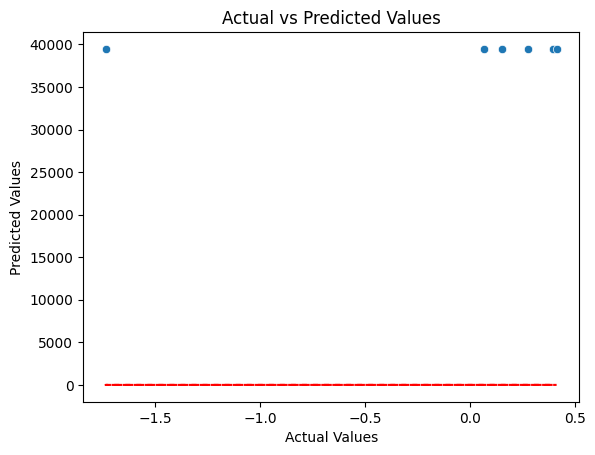

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs predicted values, visualization
sns.scatterplot(x=y_test.flatten(), y=y_transformed.flatten())
plt.plot(y_test.flatten(), y_test.flatten(), color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()